# Heart Disease Classification

## 1. Introduction

### 1.1 Background
Cardiovascular diseases (CVDs), especially heart disorders, are a primary cause of death worldwide, according to the World Health Organization. 

The aim of this project is to answer the following question: **Is heart disease present (values = 1, 2, 3, 4) or absent (value = 0) in a new patient?**

### 1.2 Data set
To answer this question, we will analyze data downloaded from the UCI Machine Learning Repository. Below, we compile four databases (Cleveland, Hungary, Switzerland, and VA Long Beach) into one dataset: `heart_disease_dataset`. Each row in the data set contains data about one patient. We will add a column `presence` (the predicted attribute) to indicate the presence or absence of heart disease. 

Relevant columns in the dataset:

- `age` - age in years
- `sex` - sex (1 = male; 0 = female)
- `cp` - chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholestoral in mg/dl
- `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- `ca` - number of major vessels (0-3) colored by flourosopy
- `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
- `presence` - predicted attribute 

## 2. Preliminary exploratory data analysis


### 2.1 Loading libraries

In [82]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(tidymodels)

### 2.2 Reading, Cleaning, and Wrangling Data

- Assign column names "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "presence".
- Combine four data sets into one.
- Filter out any rows containing NA or invalid value.
- Select only `age`, `trestbps`, `chol`, `region`, `presence` (predicted attribute) columns.
- Shuffle rows of the data frame for a more representative randomly ordered data set.
- Represent `region` and `presence` as factors.


In [83]:
path_names <- list("data/processed.cleveland.data", "data/processed.switzerland.data", "data/processed.va.data")
factors <- list("cleveland", "switzerland", "va")
colnames <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "presence")

heart_disease_data <- read_delim("data/reprocessed.hungarian.data", delim = " ", col_names = colnames) %>% mutate(region = factor("hungary"))

i <- 1 # for every iteration in the loop, increment by 1
for (p in path_names) {
    # for every file processed, add a col that has the region name
    data_from_file <- read_csv(p, col_names = colnames, na = c("?")) %>%
      mutate(region = factor(factors[i]))

    # add the freshly read data to the master data frame
    heart_disease_data <- rbind(heart_disease_data, data_from_file)

    # increment to keep track of the position in the list of files
    i <- i + 1
}

heart_disease_data <- mutate_at(heart_disease_data, vars(presence), factor) # create a new col presence to df
heart_disease_data <- heart_disease_data %>% select(age, trestbps, chol, region, presence) # select relevant predictor variable columns, region, and predicted attribute "presence"

heart_disease_data <- heart_disease_data %>% drop_na() # drop any rows with NA (removes 920 - 858 = 62 rows)

# Shuffling rows of the data frame so that they are no longer ordered by region and are randonly ordered
set.seed(3456) # reproducible
rand_order <- sample(nrow(heart_disease_data)) # random ordering
heart_disease_data <- heart_disease_data[rand_order,] # shuffle the rows of the data frame

head(heart_disease_data) # view first few rows 
heart_disease_data # view entire data set 
cat("Heart disease data set after pre-processing has", nrow(heart_disease_data), "rows and", ncol(heart_disease_data), "columns")

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  presence = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  presence = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_doubl

age,trestbps,chol,region,presence
<dbl>,<dbl>,<dbl>,<fct>,<fct>
68,134,254,va,0
49,130,0,va,2
52,128,255,cleveland,1
63,135,252,cleveland,0
56,132,184,cleveland,1
46,150,163,hungary,0


age,trestbps,chol,region,presence
<dbl>,<dbl>,<dbl>,<fct>,<fct>
68,134,254,va,0
49,130,0,va,2
52,128,255,cleveland,1
63,135,252,cleveland,0
56,132,184,cleveland,1
46,150,163,hungary,0
57,128,303,cleveland,0
66,112,212,cleveland,2
64,128,263,cleveland,0


Heart disease data set after pre-processing has 858 rows and 5 columns

### 2.2 Splitting & Summarizing data

We will be partitioning `heart_disease_data` into a training (75%) and testing (25%) set using the `tidymodels` package. We will then find the best k-nn classifier using the training set and evaluate the performance of our model on the test dataset. We will use the variable `presence_yn` as our class label after splitting the `presence` variable into yes and no.

#### Summary Statistics (only using training data)
- Count the number of patients with presence = 0 (heart disease absent), and presence = 1-4 (heart disease present)
- Calculate the summary statistics  mean, median, standard deviation, max, min for the numerical variables age, chol, trestbps.
- No missing data in the dataset.

In [84]:
set.seed(3456)

# Assigning presence 1-4 to 1 and presence 0 to 0
heart_disease_data1 <- heart_disease_data %>%
                            filter(presence == "0") %>%
                            mutate(presence_yn = "no")
heart_disease_data2 <- heart_disease_data %>%
                            filter(presence != "0") %>%
                            mutate(presence_yn = "yes")

heart_disease_data <- rbind(heart_disease_data1, heart_disease_data2)
heart_disease_data <- heart_disease_data %>%
                        mutate(presence_yn = as.factor(presence_yn))


heart_disease_data_split <- initial_split(heart_disease_data, prop = 3/4, strata = presence)  
heart_disease_data_train <- training(heart_disease_data_split)   
heart_disease_data_test <- testing(heart_disease_data_split)

# Predictors as numeric
heart_disease_data_train <- mutate(heart_disease_data_train, across(age:chol, as.numeric))
heart_disease_data_test <- mutate(heart_disease_data_test, across(age:chol, as.numeric))

# heart_disease_data_train
# dim(heart_disease_data_train)

# heart_disease_data_test
# dim(heart_disease_data_test)

count_by_presence <- heart_disease_data_train %>%
                      group_by(presence_yn) %>%
                      summarise(count = n())
count_by_presence 
                            
# select the numerical columns of age, chol, trestbps
heart_disease_data_train_num <- heart_disease_data_train %>% select(-region, -presence)

# heart_disease_data_train 

# Data Summary Table

heart_disease_data_mean <- heart_disease_data_train_num %>% summarize(across(age:chol, mean))
heart_disease_data_median <- heart_disease_data_train_num %>% summarize(across(age:chol, median))
heart_disease_data_max <- heart_disease_data_train_num %>% summarize(across(age:chol, max))
heart_disease_data_min <- heart_disease_data_train_num %>% summarize(across(age:chol, min))
heart_disease_data_sd <- heart_disease_data_train_num %>% summarize(across(age:chol, sd))
    
heart_disease_data_max = heart_disease_data_max %>%
    pivot_longer(
        cols = age:chol,
        names_to = "variable",
        values_to = "max"
    )

heart_disease_data_min = heart_disease_data_min %>%
    pivot_longer(
        cols = age:chol,
        names_to = "variable",
        values_to = "min"
    )

heart_disease_data_mean = heart_disease_data_mean %>%
    pivot_longer(
        cols = age:chol,
        names_to = "variable",
        values_to = "mean"
    )

heart_disease_data_median = heart_disease_data_median %>%
    pivot_longer(
        cols = age:chol,
        names_to = "variable",
        values_to = "median"
    )

heart_disease_data_sd = heart_disease_data_sd %>%
    pivot_longer(
        cols = age:chol,
        names_to = "variable",
        values_to = "standard_deviation"
    )

heart_disease_data_table <- merge(heart_disease_data_max, heart_disease_data_min, by = 'variable') %>% 
                            merge(heart_disease_data_mean, by = 'variable') %>% 
                            merge(heart_disease_data_median,by = 'variable') %>%
                            merge(heart_disease_data_sd, by = 'variable')
heart_disease_data_table

# Scaling variables


`summarise()` ungrouping output (override with `.groups` argument)



presence_yn,count
<fct>,<int>
no,293
yes,351


variable,max,min,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,77,28,53.02795,54,9.404137
chol,564,-9,193.00466,223,113.303574
trestbps,200,-9,131.67081,130,19.891080


### 2.3 Visualization (using training data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



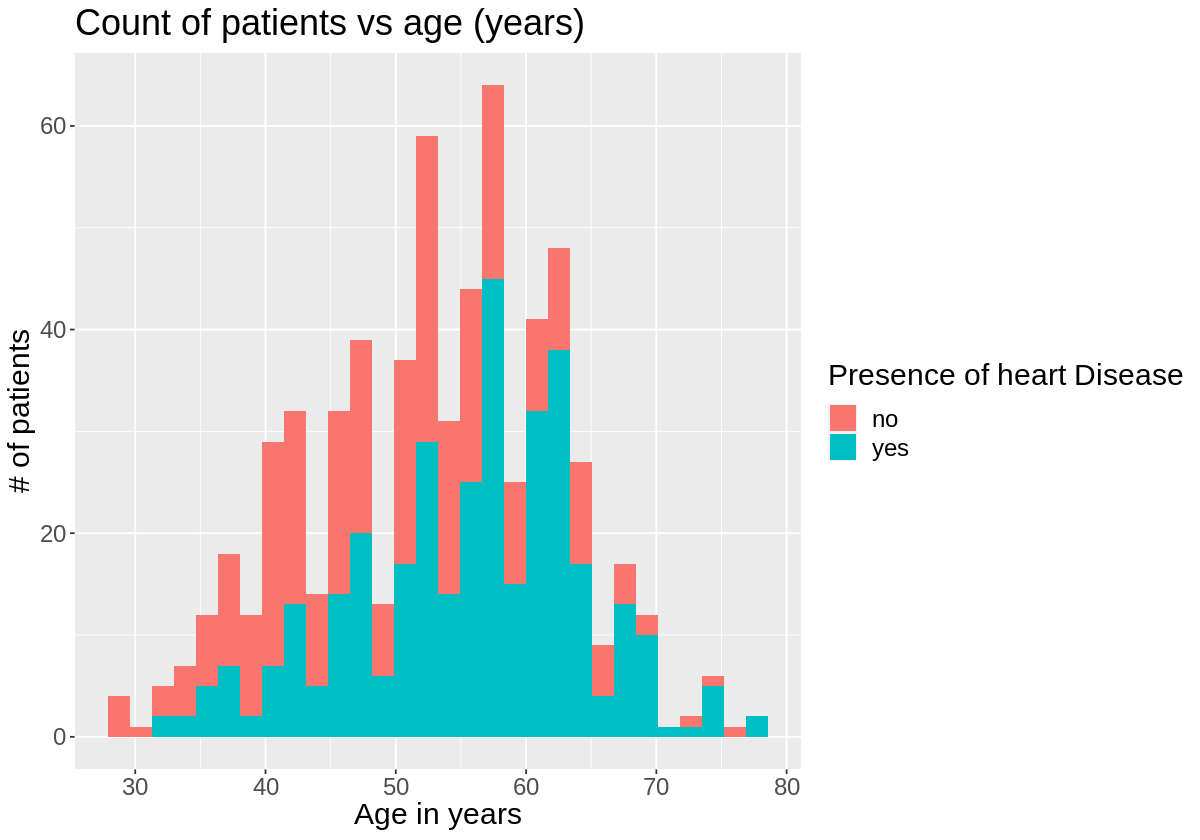

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



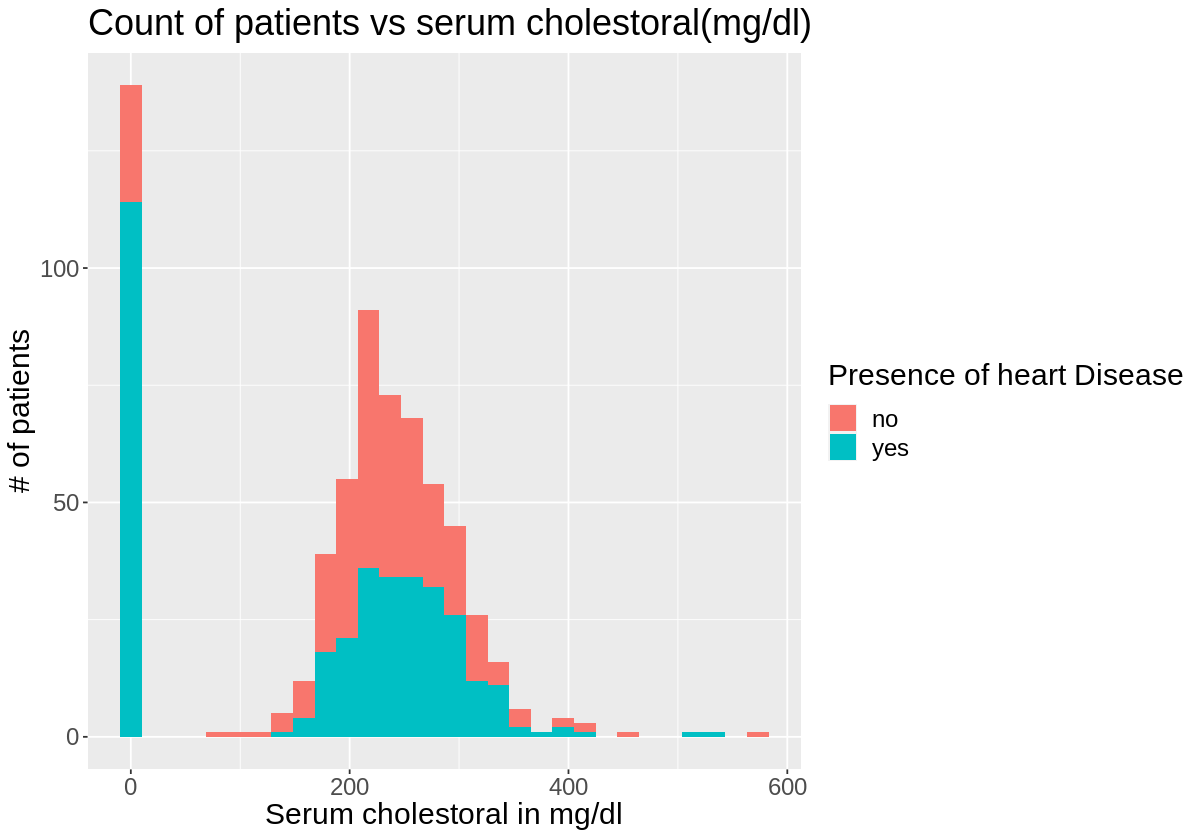

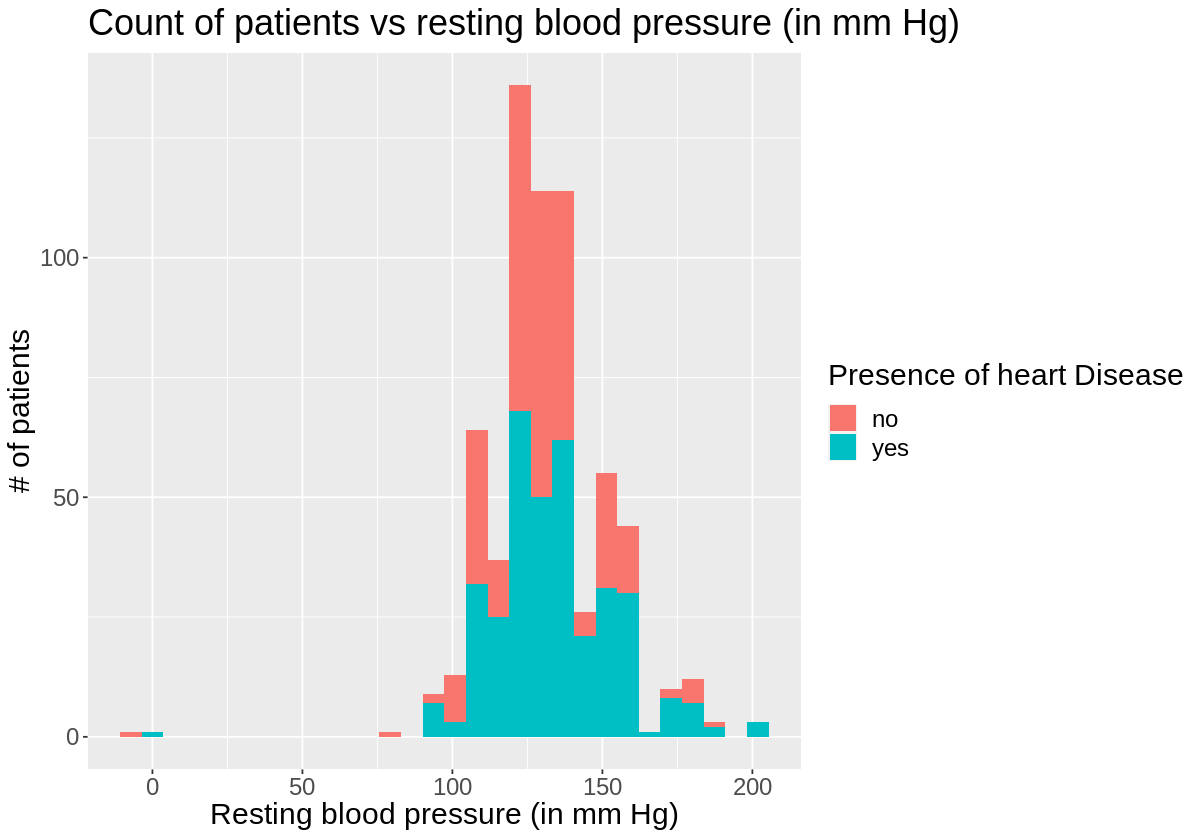

In [85]:
options(repr.plot.width = 10, repr.plot.height = 7)

# Presence/absence based on age
heart_disease_data_train_age_plot <- ggplot(heart_disease_data_train, aes(x = age)) +
                                    geom_histogram(aes(fill = presence_yn)) +
                                    labs(x = "Age in years", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Count of patients vs age (years)")
heart_disease_data_train_age_plot


# Presence/absence based on cholestrol
heart_disease_data_train_chol_plot <- ggplot(heart_disease_data_train, aes(x = chol)) +
                                    geom_histogram(aes(fill = presence_yn)) +
                                    labs(x = "Serum cholestoral in mg/dl", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Count of patients vs serum cholestoral(mg/dl)")
heart_disease_data_train_chol_plot


# Presence/absence based on resting blood pressure
heart_disease_data_train_trestbps_plot <- ggplot(heart_disease_data_train, aes(x = trestbps)) +
                                    geom_histogram(aes(fill = presence_yn)) +
                                    labs(x = "Resting blood pressure (in mm Hg)", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Count of patients vs resting blood pressure (in mm Hg)")
heart_disease_data_train_trestbps_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



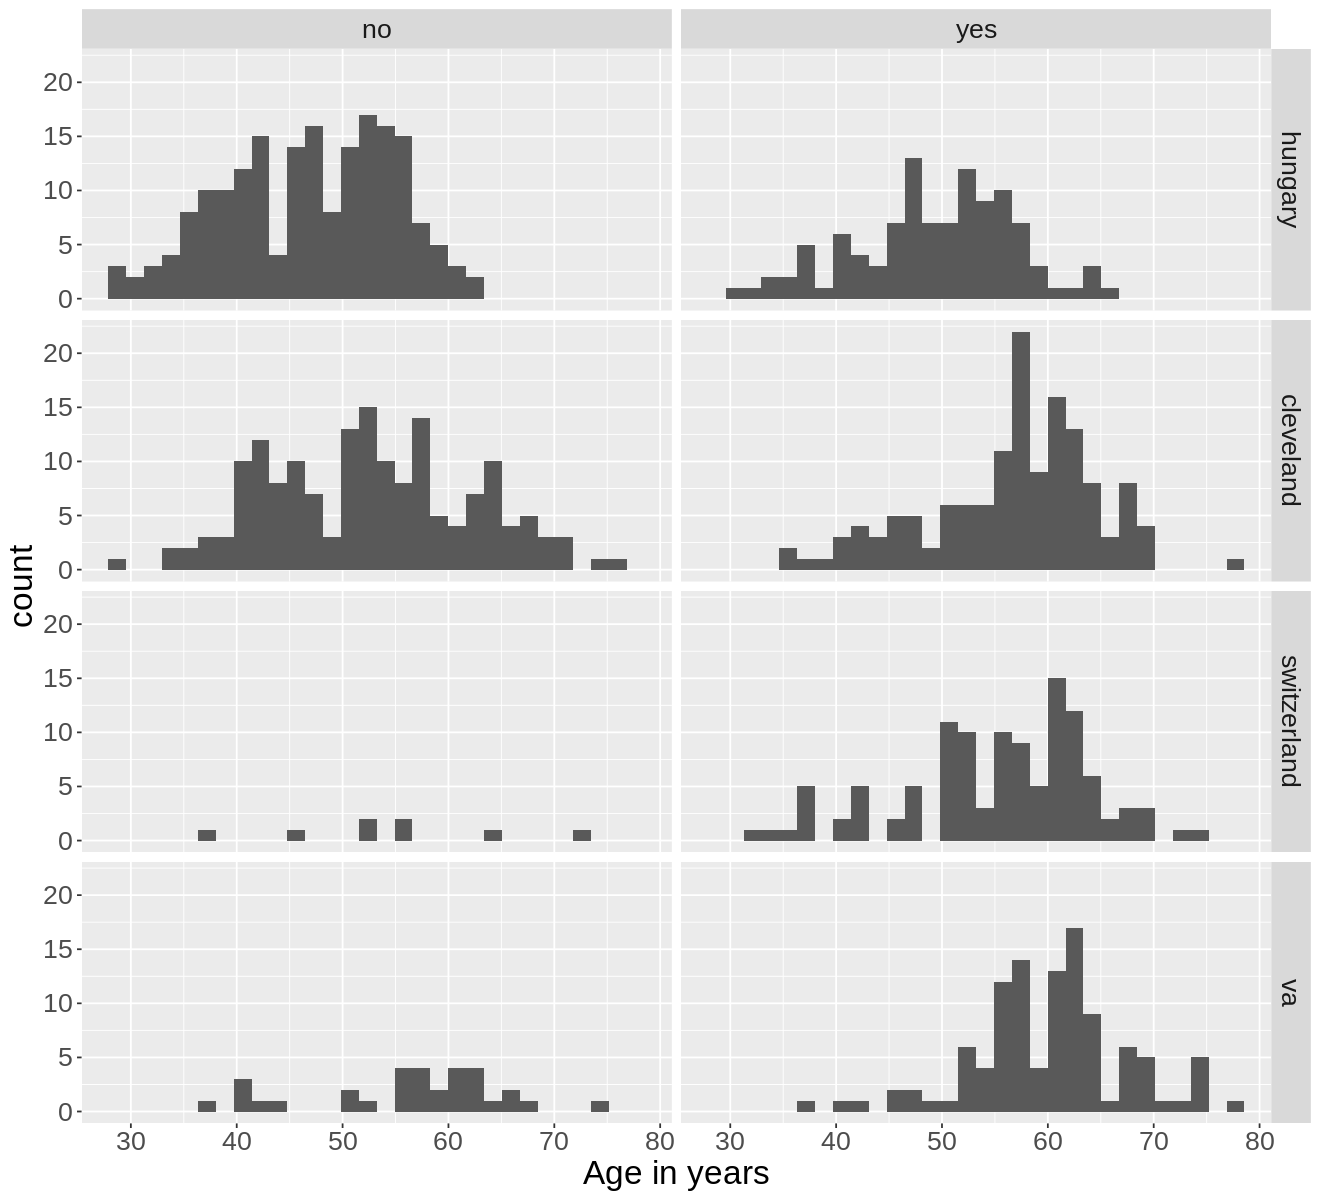

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



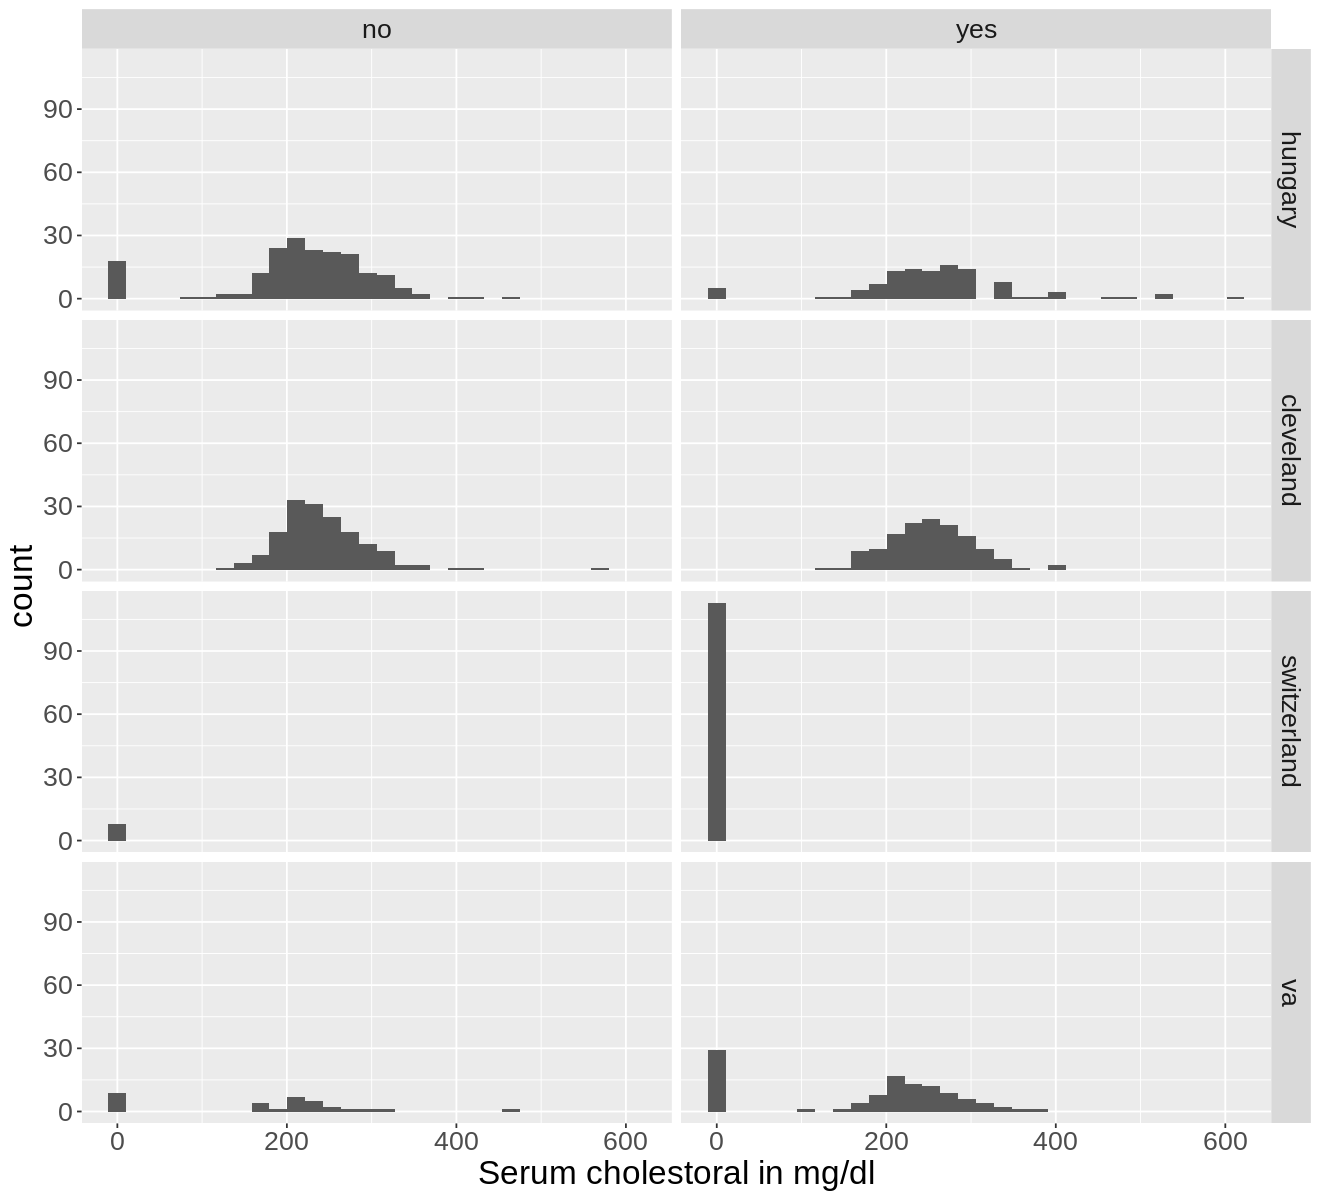

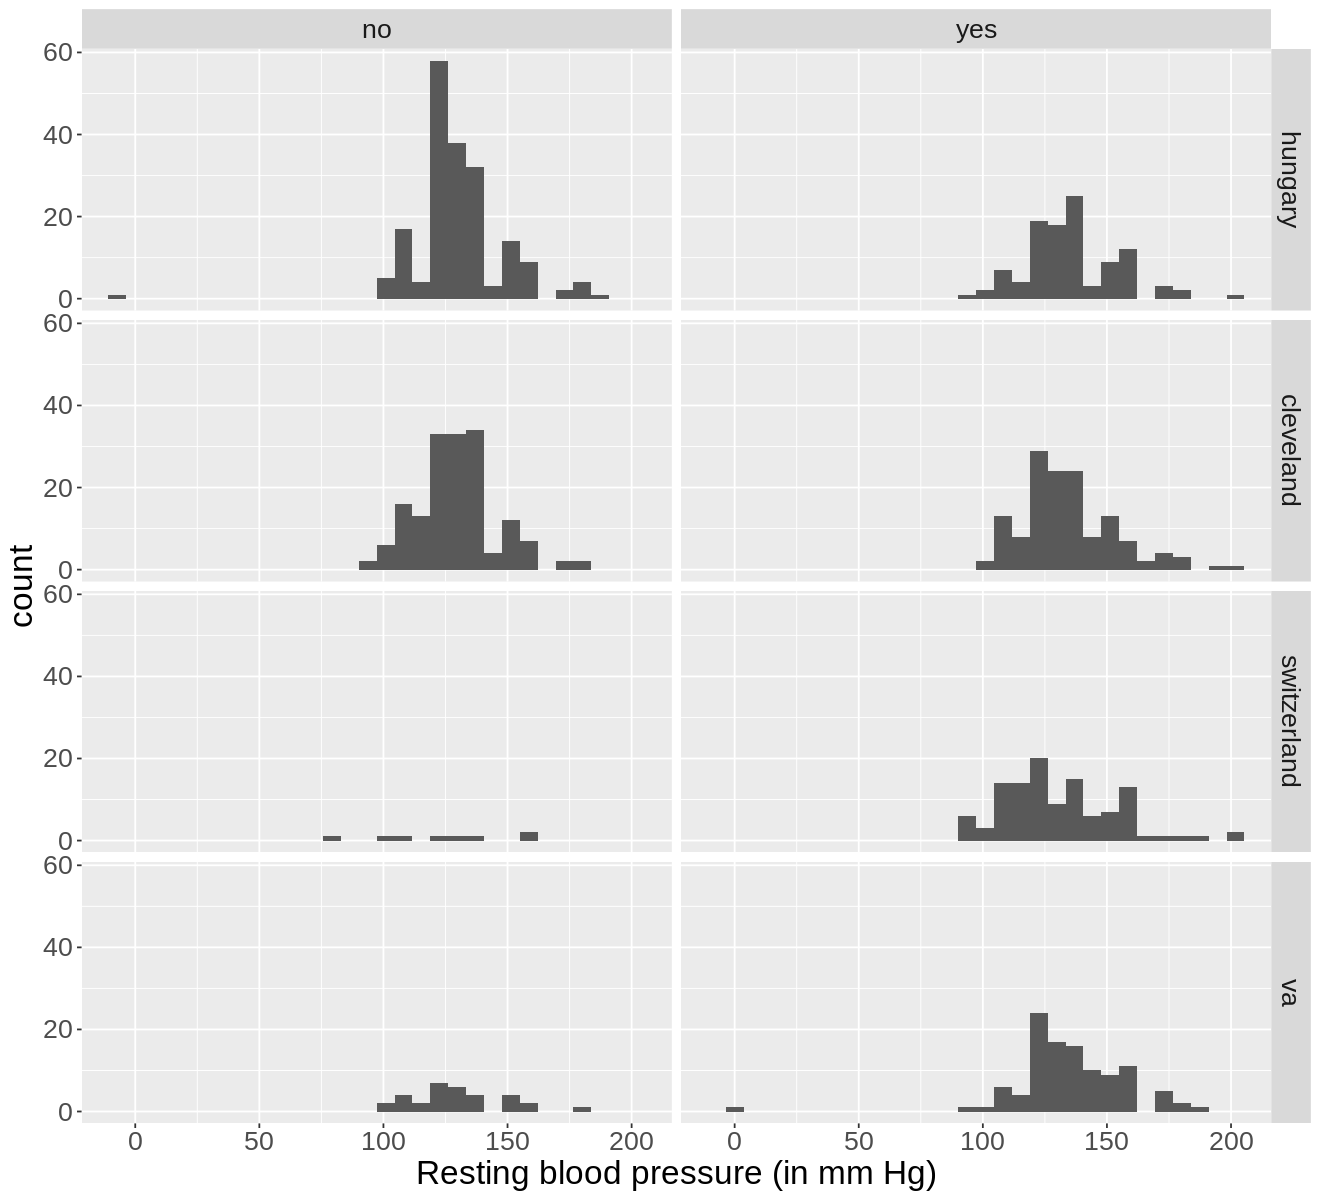

In [86]:
# Analysis by region 

# Cholestrol Analysis - original histogram of chol distribution
options(repr.plot.width = 11, repr.plot.height = 10)

heart_disease_data_train_age_plot <- ggplot(heart_disease_data, aes(x = age)) + 
                                          geom_histogram() +
                                          facet_grid(rows = vars(region), cols = vars(presence_yn)) +
                                          labs(x = "Age in years") +
                                          theme(text = element_text(size = 20)) 

heart_disease_data_train_age_plot

heart_disease_data_train_chol_plot <- ggplot(heart_disease_data, aes(x = chol)) + 
                                          geom_histogram() +
                                          facet_grid(rows = vars(region), cols = vars(presence_yn)) +
                                          labs(x = "Serum cholestoral in mg/dl") +
                                          theme(text = element_text(size = 20)) 

heart_disease_data_train_chol_plot

heart_disease_data_train_trestbps_plot <- ggplot(heart_disease_data, aes(x = trestbps)) + 
                                          geom_histogram() +
                                          facet_grid(rows = vars(region), cols = vars(presence_yn)) +
                                          labs(x = "Resting blood pressure (in mm Hg)") +
                                          theme(text = element_text(size = 20)) 

heart_disease_data_train_trestbps_plot

### Scatterplots of two variables

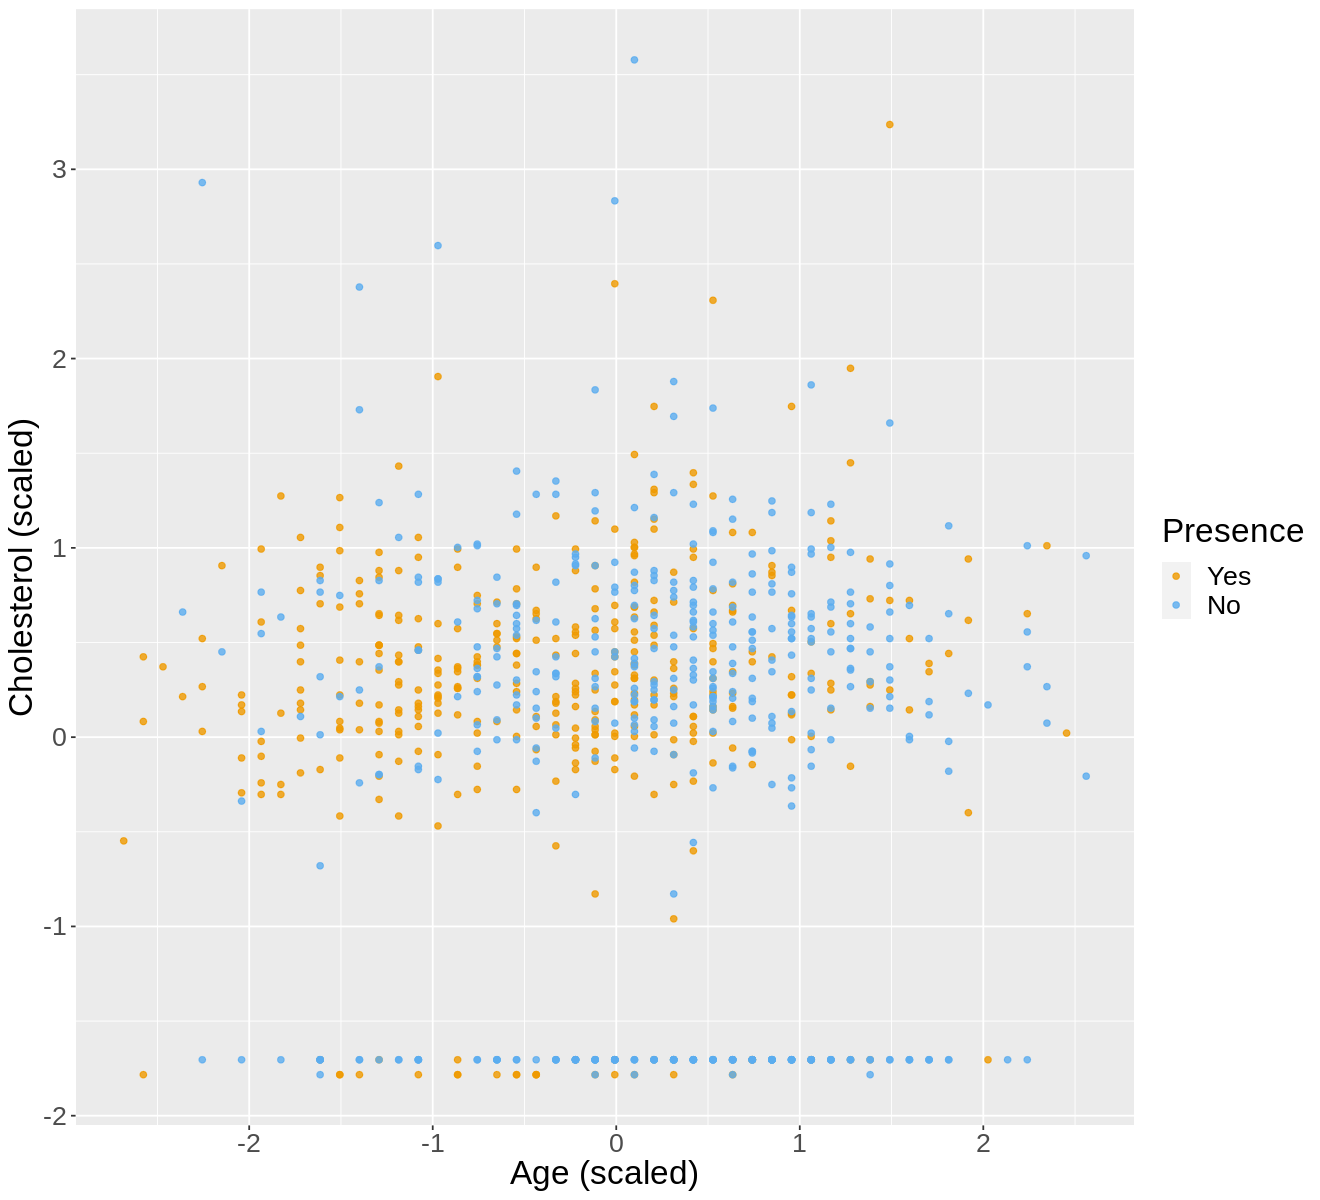

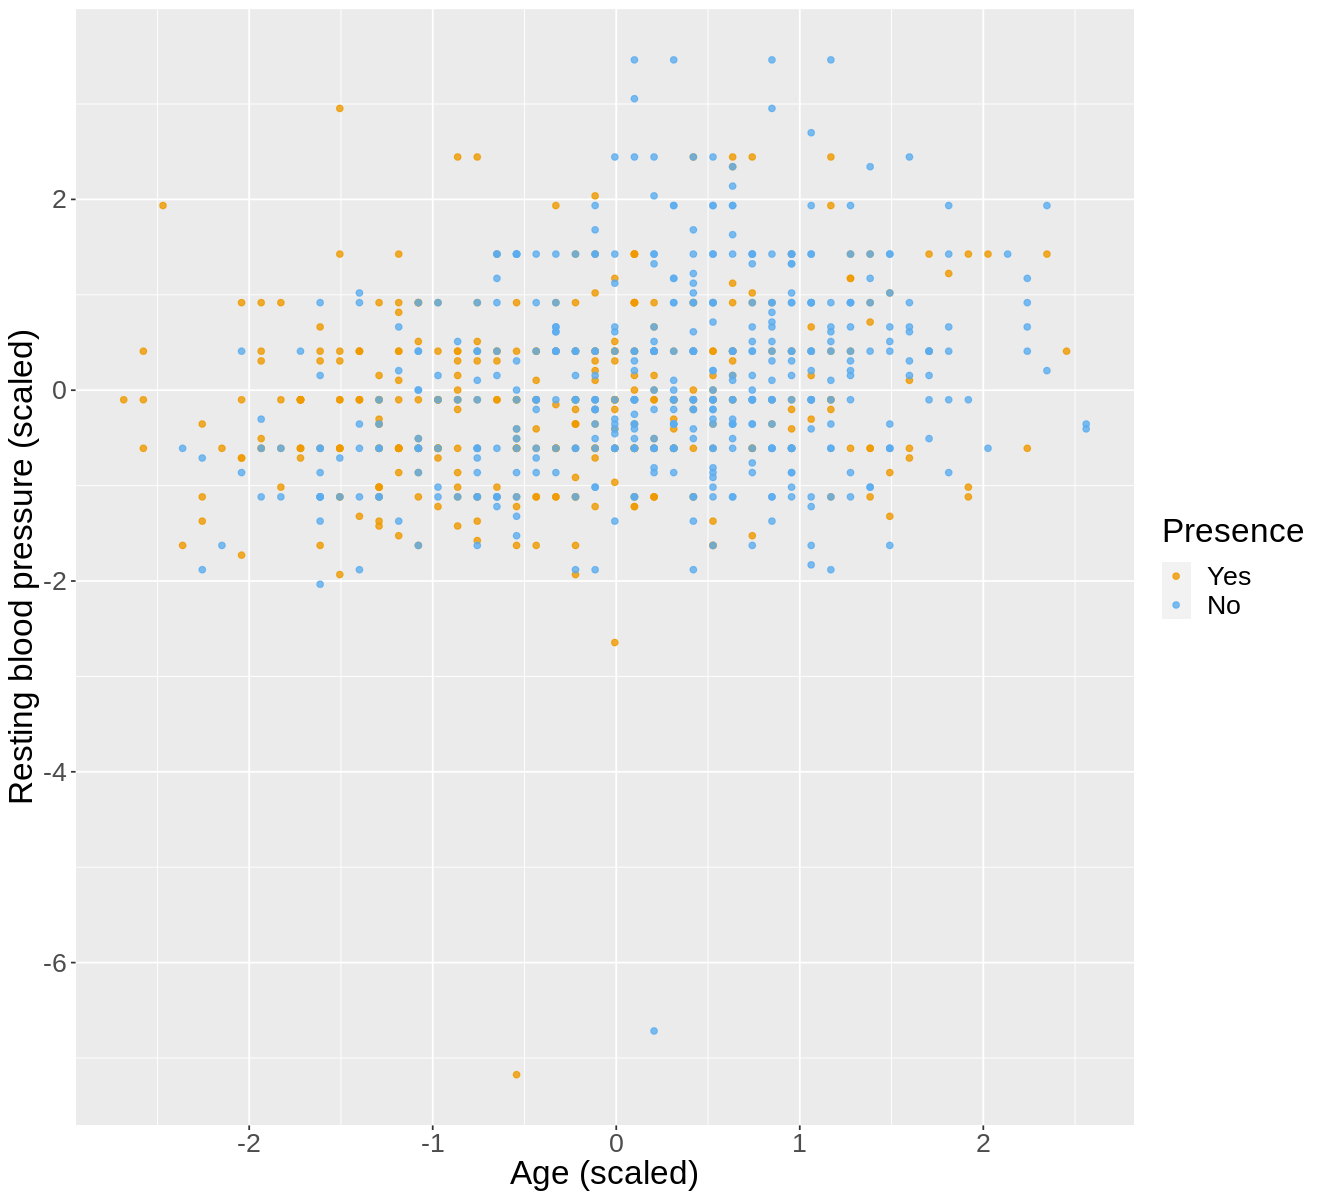

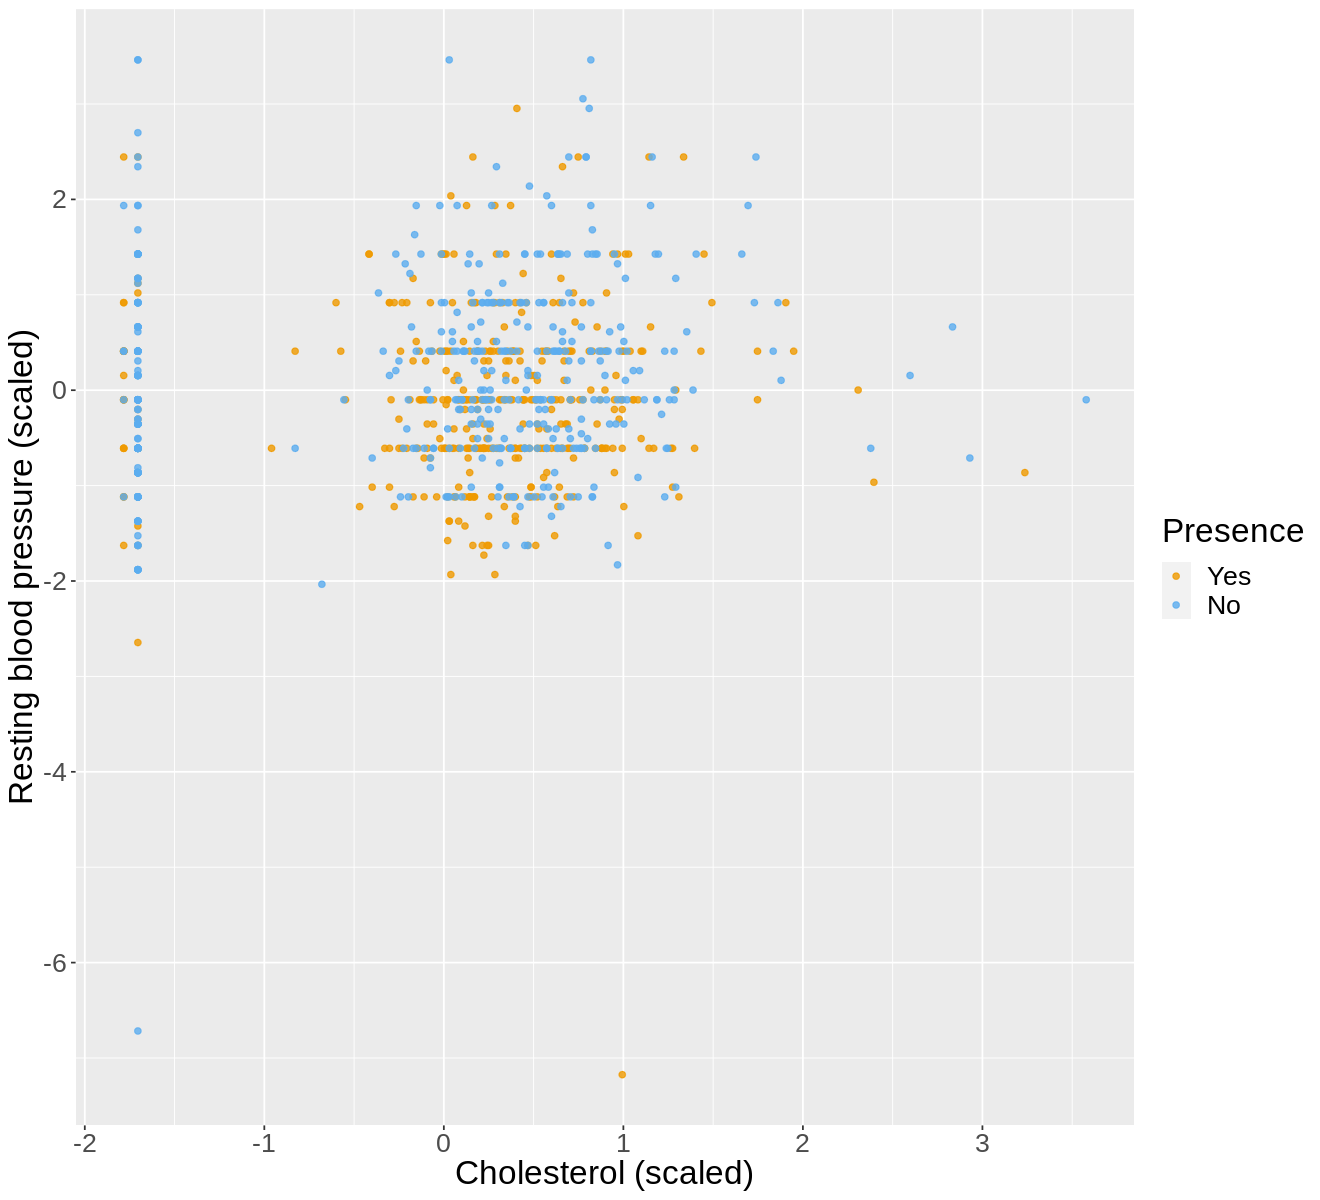

In [118]:
heart_disease_data_scaled <- heart_disease_data %>%
  mutate(age = scale(age), chol = scale(chol), trestbps = scale(trestbps))

age_chol <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = chol, color = presence_yn)) +
  geom_point(alpha = 0.8) +
  labs(x = "Age (scaled)", 
       y = "Cholesterol (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                                          theme(text = element_text(size = 20)) 
age_chol

age_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = trestbps, color = presence_yn)) +
  geom_point(alpha = 0.8) +
  labs(x = "Age (scaled)", 
       y = "Resting blood pressure (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                                          theme(text = element_text(size = 20)) 
age_trestbps

chol_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = chol, y = trestbps, color = presence_yn)) +
  geom_point(alpha = 0.8) +
  labs(x = "Cholesterol (scaled)", 
       y = "Resting blood pressure (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                                          theme(text = element_text(size = 20)) 
chol_trestbps

## 3. Methods

### 3.1 Analysis and Variables
Many physiological attributes have been shown through studies and reports by the CDC and WHO to have strong links to heart disease. After examining the data and filtering out categorical variables, we have chosen the three most relevant out of the five numerical values in our dataset to analyze: trestbps (resting blood pressure), chol (serum cholesterol in mg/dl), and age (age in years). Using our chosen variables, we will construct and test a classifier using the KNN classification model and choose an appropriate k using cross-validation.

### 3.2 Visualization of Results
We will visualize results of our classification using different plots to indicate the relationships among all of the variables. This includes plotting each predictor against each other and colouring based on presence to show the relationship and line graphs to determine what number of k neighbours we will use.

## 4. Expected outcomes and significance

### 4.1 Expected Findings
We should be able to predict the presence or absence of heart disease in new patients by training and testing our model with good accuracy.

### 4.2 Possible Impacts
- Using our model, patients can be classified as high or low risk for heart disease using their cholesterol, blood pressure, and age.
- Early diagnosis of heart disease based on this classification can help save more lives by allowing patients to make lifestyle adjustments or seek medical assistance sooner.


### 4.3 Future Questions
- Are there other factors not included in this dataset which could be important in predicting presence of heart disease?
- If more factors are considered, would it improve accuracy of the model?


## 5. Classification
### 5.1 Creating the model and recipe

In [87]:
#Creating model and recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")


hd_recipe <- recipe(presence_yn ~ age + chol + trestbps, data = heart_disease_data_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

### 5.2 Performing cross-validation and determining which k to use

In [88]:
set.seed(3456)
hd_vfold <- vfold_cv(heart_disease_data_train, v = 5, strata = presence_yn)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() %>%
                 add_recipe(hd_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = hd_vfold, grid = k_vals) %>%
                 collect_metrics()

accuracies <- knn_results %>%
                 filter(.metric == "accuracy")
accuracies

max_accuracy <- accuracies %>%
filter(mean == max(mean))
max_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6008993,5,0.008281778,Model01
2,accuracy,binary,0.5993368,5,0.008025435,Model02
3,accuracy,binary,0.6474730,5,0.011896982,Model03
4,accuracy,binary,0.6490234,5,0.011079945,Model04
5,accuracy,binary,0.6523286,5,0.016282878,Model05
6,accuracy,binary,0.6523286,5,0.016282878,Model06
7,accuracy,binary,0.6445520,5,0.015148064,Model07
8,accuracy,binary,0.6445520,5,0.015148064,Model08
9,accuracy,binary,0.6709336,5,0.013870792,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.6709336,5,0.01387079,Model09
10,accuracy,binary,0.6709336,5,0.01387079,Model10


Let's visualize the accuracies using `ggplot` below.

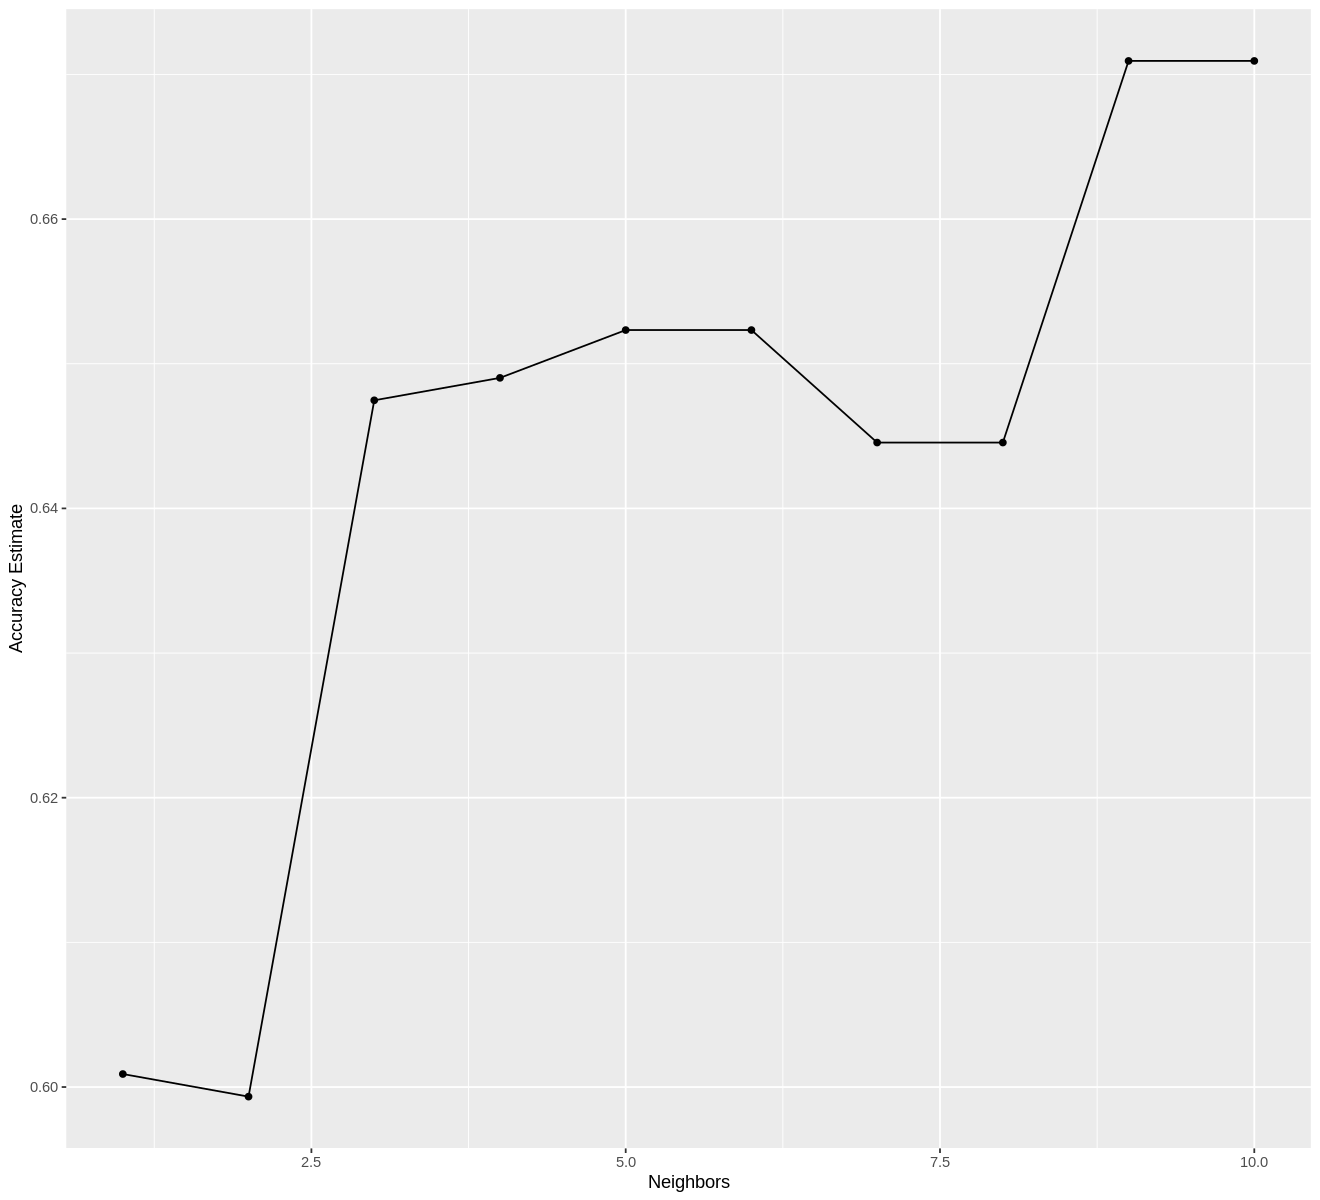

In [89]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate')
cross_val_plot

The k-values of 9 and 10 have the highest accuracy. 9 is lower than 10 but changing the k to a nearby value appears to decrease the accuracy. The cost of training the model is not prohibitively expensive either way. Therefore, we select k = 10 for our classifier to be safe.

In [100]:
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
  set_engine("kknn") %>%
  set_mode("classification")

hd_fit <- workflow () %>%
                  add_recipe(hd_recipe) %>%
                  add_model(knn_spec2) %>% 
                  fit(data = heart_disease_data_train)
hd_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~10, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3462733
Best kernel: rectangular
Best k: 10

In [101]:
set.seed(3456)
hd_test_predictions <- predict(hd_fit, heart_disease_data_test) %>%
  bind_cols(heart_disease_data_test)

hd_metrics <- hd_test_predictions %>% 
                metrics(truth = presence_yn, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
hd_conf_mat <- hd_test_predictions %>%
                        conf_mat(truth = presence_yn, estimate = .pred_class) 
hd_metrics
hd_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6542056


          Truth
Prediction no yes
       no  61  36
       yes 38  79

## Testing out other predictor combinations

Our accuracy on the testing data is only around 0.65, so let's see if we can improve the accuracy by using less predictors as some of them might be irrelevant.

In [102]:
#Cross-validation of age + chol only

set.seed(3456)

hd_recipe2 <- recipe(presence_yn ~ age + chol, data = heart_disease_data_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

knn_results2 <- workflow() %>%
                 add_recipe(hd_recipe2) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = hd_vfold, grid = k_vals) %>%
                 collect_metrics()

accuracies2 <- knn_results2 %>%
                 filter(.metric == "accuracy")
max_accuracy2 <- accuracies2 %>%
filter(mean == max(mean))
max_accuracy2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.6740105,5,0.02349284,Model09
10,accuracy,binary,0.6740105,5,0.02349284,Model10


In [103]:
#Cross-validation of age + trestbps only

set.seed(3456)

hd_recipe3 <- recipe(presence_yn ~ age + trestbps, data = heart_disease_data_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

knn_results3 <- workflow() %>%
                 add_recipe(hd_recipe3) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = hd_vfold, grid = k_vals) %>%
                 collect_metrics()

accuracies3 <- knn_results3 %>%
                 filter(.metric == "accuracy")
max_accuracy3 <- accuracies3 %>%
filter(mean == max(mean))
max_accuracy3

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.6288911,5,0.02102808,Model09


In [104]:
#Cross-validation of chol + trestbps only

set.seed(3456)

hd_recipe4 <- recipe(presence_yn ~ chol + trestbps, data = heart_disease_data_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

knn_results4 <- workflow() %>%
                 add_recipe(hd_recipe4) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = hd_vfold, grid = k_vals) %>%
                 collect_metrics()

accuracies4 <- knn_results4 %>%
                 filter(.metric == "accuracy")
max_accuracy4 <- accuracies4 %>%
filter(mean == max(mean))
max_accuracy4

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.6039876,5,0.006231156,Model07


## Predicting other predictor combinations

As seen in the tests above, using age and cholesterol as predictors with 10 k-neighbours yielded a higher accuracy than using all three variables. Let's test the accuracy of predictions on the testing data with only age and cholesterol. 

In [97]:
#Prediction for age + chol with 10 neighbours
set.seed(3456)
knn_spec_10 <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
  set_engine("kknn") %>%
  set_mode("classification")

hd_fit2 <- workflow () %>%
                  add_recipe(hd_recipe2) %>%
                  add_model(knn_spec_10) %>% 
                  fit(data = heart_disease_data_train)

hd_test_predictions2 <- predict(hd_fit2, heart_disease_data_test) %>%
  bind_cols(heart_disease_data_test)

hd_metrics2 <- hd_test_predictions2 %>% 
                metrics(truth = presence_yn, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
hd_conf_mat2 <- hd_test_predictions2 %>%
                        conf_mat(truth = presence_yn, estimate = .pred_class) 
hd_metrics2
hd_conf_mat2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6168224


          Truth
Prediction no yes
       no  52  35
       yes 47  80

As seen in the above metrics and matrix, the prediction accuracy on our testing set did not increase after cross-validation. We'll also test `age` and `trestbps` just in case, as the accuracy was close as well. 

In [105]:
#Prediction for age + chol with 9 neighbours
set.seed(3456)
knn_spec_9 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
  set_engine("kknn") %>%
  set_mode("classification")

hd_fit3 <- workflow () %>%
                  add_recipe(hd_recipe3) %>%
                  add_model(knn_spec_9) %>% 
                  fit(data = heart_disease_data_train)

hd_test_predictions3 <- predict(hd_fit3, heart_disease_data_test) %>%
  bind_cols(heart_disease_data_test)

hd_metrics3 <- hd_test_predictions3 %>% 
                metrics(truth = presence_yn, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
hd_conf_mat3 <- hd_test_predictions3 %>%
                        conf_mat(truth = presence_yn, estimate = .pred_class) 
hd_metrics3
hd_conf_mat3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.588785


          Truth
Prediction no yes
       no  56  45
       yes 43  70

The accuracy still didn't improve from when we used all three variables, so we'll proceed by comparing all three as we originally intended. 

### Plotting predictions

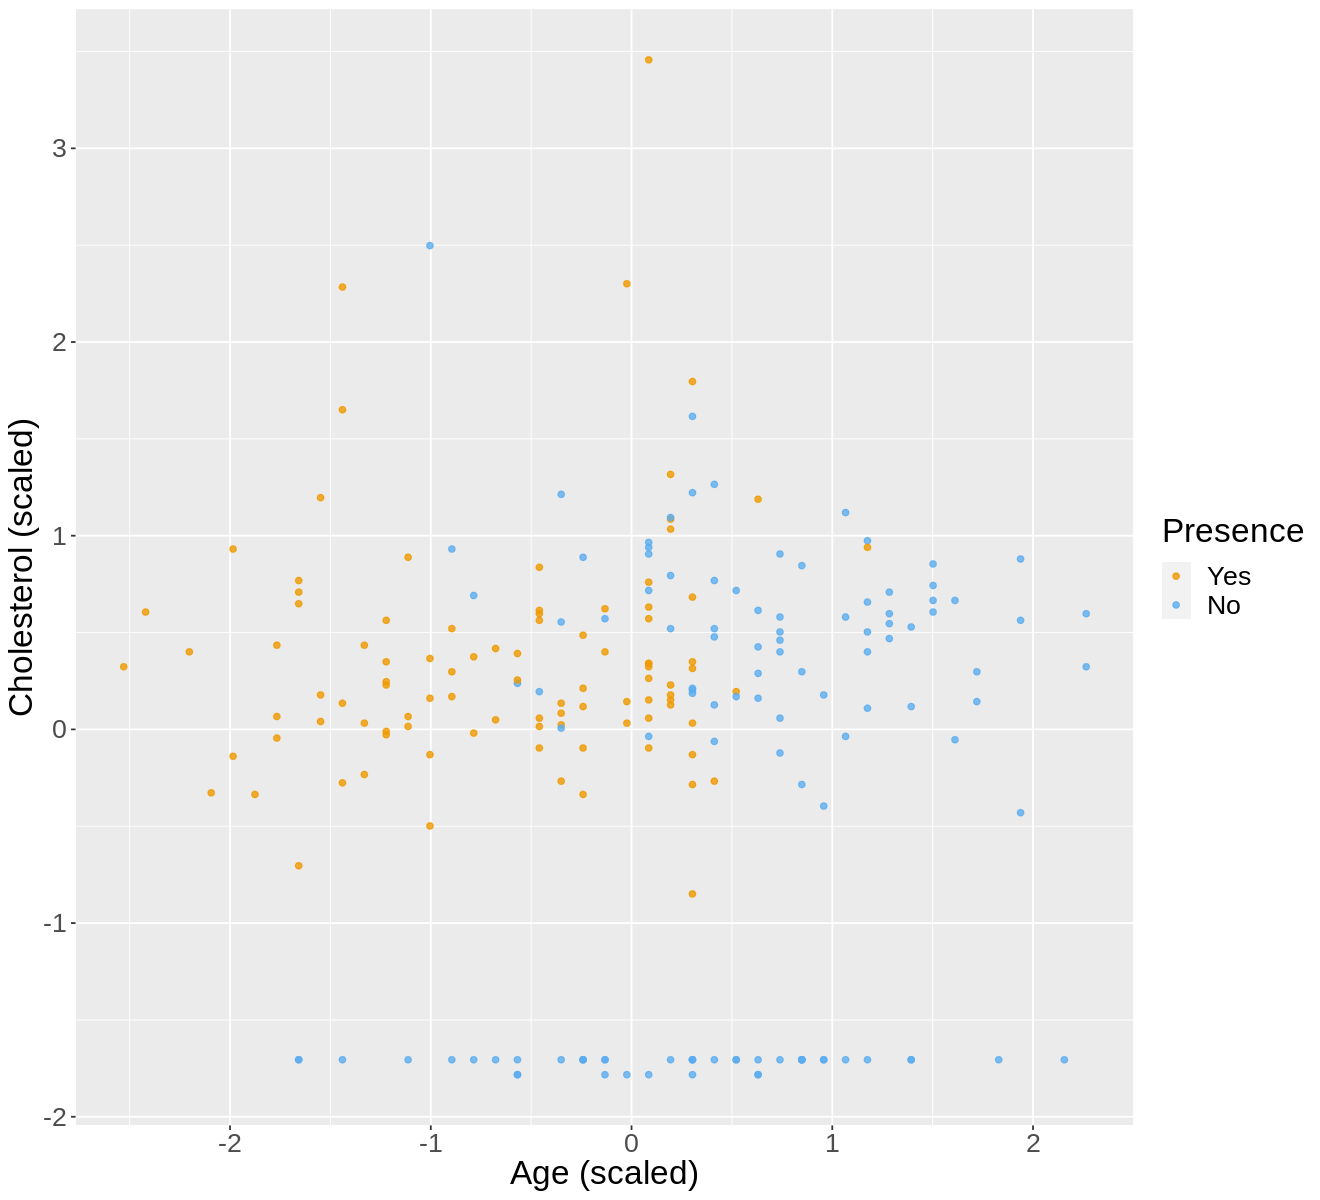

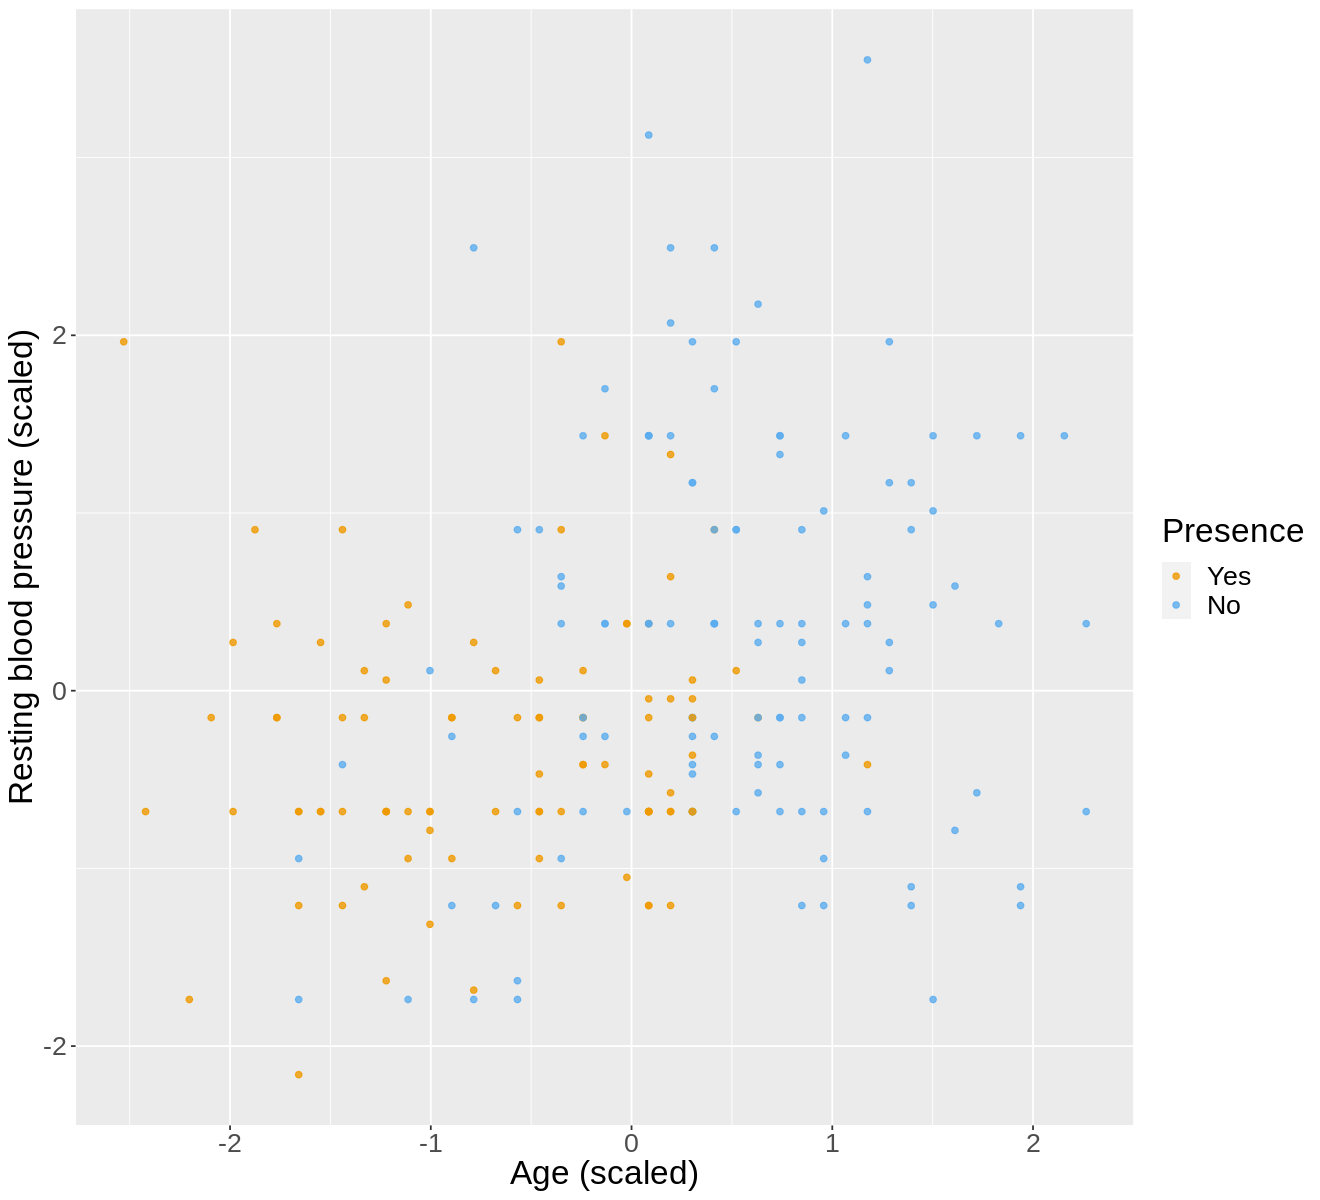

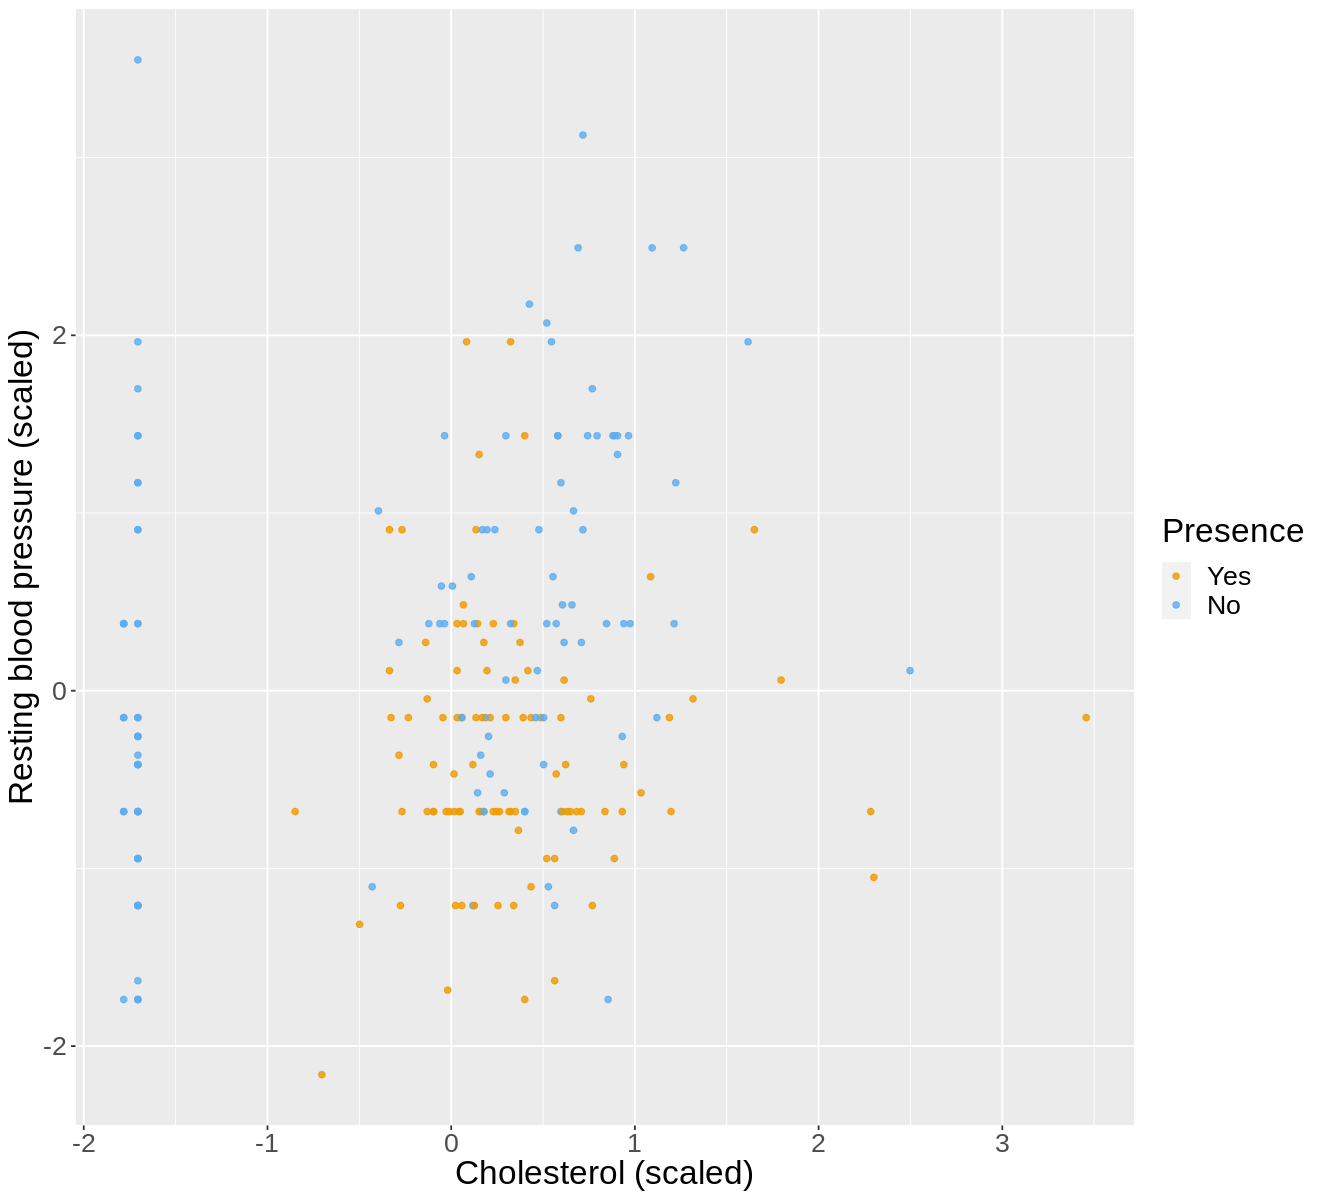

In [123]:

hd_test_predictions_scaled <- hd_test_predictions %>%
  mutate(age = scale(age), chol = scale(chol), trestbps = scale(trestbps))

prediction_plot1 <- hd_test_predictions_scaled %>%
  ggplot(aes(x = age, y = chol, color = .pred_class)) +
  geom_point(alpha = 0.8) +
  labs(x = "Age (scaled)", 
       y = "Cholesterol (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                     theme(text = element_text(size = 20)) 
prediction_plot1

prediction_plot2 <- hd_test_predictions_scaled %>%
  ggplot(aes(x = age, y = trestbps, color = .pred_class)) +
  geom_point(alpha = 0.8) +
  labs(x = "Age (scaled)", 
       y = "Resting blood pressure (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                     theme(text = element_text(size = 20)) 
prediction_plot2

prediction_plot3 <- hd_test_predictions_scaled %>%
  ggplot(aes(x = chol, y = trestbps, color = .pred_class)) +
  geom_point(alpha = 0.8) +
  labs(x = "Cholesterol (scaled)", 
       y = "Resting blood pressure (scaled)",
       color = "Presence") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2"))  +
                     theme(text = element_text(size = 20)) 
prediction_plot3